## Проект Megafon
**Шаг 2: Выбор модели и финальная модель. Для первичной обработки данных см. 1_Megafon_project.ipynb**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')

import sklearn


import datetime as dt

from sklearn.compose import make_column_transformer
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

In [4]:
data_train = pd.read_pickle('data_train_m.pickle')
data_test = pd.read_pickle('data_test_m.pickle')
data_train.head()

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,2582523,2.0,1531083600,0.0,314.560029,9.290888,342.989214,7.523202,337.571754,-13.58179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,340.590873,329.26189,-0.000725,-0.016435,-0.107041,-5.41746,1.401479,28.429185,-10.744164,-0.094251,-0.001733,-0.009327,2.497791,0.200138,-0.00909,0.648138,0.785634,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,307.973041,9728.201596,-330.600797,10058.802436,-89.504287,-119.724355,-6.012019,4.514146,-10.526161,160.453718,-4.418641,-10.717958,-28.571103,-2.130284,-4.088986,-30.171711,-25.331295,-1.958702,-6.745251,-1.671324,-0.001656,2.318354,-2.882665,-0.265234,-0.178162,-0.011644,-0.237576,-0.265662,-0.028454,-0.044465,-0.301128,-0.554677,-0.036834,-0.130031,-2.783592,-2.60662,-5.390212,-4.022547,0.0,-2.824022,-10.706438,-1.2015,-0.998268,-0.203232,0.0,-0.248755,-0.222852,-0.134088,0.0,-0.030537,-0.125866,-0.096986,-0.679774,-0.626985,-0.691912,-0.506613,-0.185299,-0.598716,-0.000115,-0.250188,-0.348913,-0.828382,-42.275915,-3.950157,-0.253037,-0.318148,-2.29064,1.132417,-0.040043,-9.408469,-0.212137,-11.955314,-1.019293,-1.473446,-0.62084,-331.796683,10056.665737,0.19201,0.006143,9724.869013,-2298.725139,-0.343415,-0.08972,-0.278878,-0.433135,-0.024048,-89.211948,-119.674411,-208.886358,0.091923,0.039549,0.244871,-1.618164,-3.681641,1.426717,0.531557,0.182717,-190.670372,6.856777,11.277409,5.174027,9.064012,0.0,-1.276187,-0.020137,-0.042636,-8.930349,-64.720802,43.03637,-34.888325,-3.861461,0.352836,-0.007024,-0.143269,0.582329,-0.212646,-0.019562,-0.000044,-0.000379,-2.548856,-0.261309,-0.536315,-0.061481,0.597843,-0.002595,-1.678214,-0.014542,0.090492,-21.183166,-44.376426,-25.320085,-51.984826,-16.961228,4.454434,-12.614497,-29.955052,-0.028857,-0.063214,-0.019198,-0.033778,-0.003149,-0.005184,-0.001431,-0.00189,28.742637,81.589693,50.067242,78.958574,-18.978121,-10.567387,-9.354808,-1.637036,-0.034569,-0.163184,88.758132,-0.466683,2.070952,-0.623737,-0.228106,-0.251959,-0.000567,-0.433736,-0.000708,-0.02921,-0.104665,-0.001358,0.0,0.039208,-0.334356,-0.008999,1482.274176,-40034.257711,0.377099,159.323947,-61602.817098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.724973e+08,348.235922,-4.405604e+08,-1.204418e+08,5.613617,-0.465191,-32.302382,193.871014,16.227508,-0.364694,-0.133771,-0.209468,19.643495,-109.884564,854.30898,-4.368281,660.889293,-108.409742,309.562669,508.382022,305.704594,6488.626154,-574.770792,-24.996269,121.369552,142.252276,-16.832889,-0.694428,-11.175933,-0.45614,0.0
1,1292549,2.0,1531083600,0.0,93.880029,-217.499112,79.939214,-270.106798,74.521754,-291.21179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,124.490873,113.16189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-33.478685,-2.55252

In [6]:
data_train.loc[data_train.id == 2076220]

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
551015,2076220,6.0,1542574800,1.0,645.070029,370.810888,636.209214,323.283202,630.791754,302.17821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,543.980873,664.35189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-8.860815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,607.973041,-1721.396404,34.278163,-1755.674564,-89.504287,-119.724355,-73.145353,-54.602524,-18.542828,-7.896282,7.950603,-10.717958,-28.571103,-15.130284,-20.088986,-28.171711,1.668705,-4.958702,-1.745251,-1.671324,-0.001656,-25.681646,-3.882665,-0.265234,0.571838,0.028356,-0.237576,0.584338,-0.028454,-0.044465,-0.301128,-0.554677,-0.036834,-0.130031,-2.783592,-2.60662,-5.390212,-4.022547,0.0,-2.824022,18.363562,-1.2015,-0.998268,-0.203232,0.0,-0.248755,-0.222852,-0.134088,0.0,-0.030537,-0.125866,-0.096986,-0.679774,-0.626985,-0.691912,-0.506613,-0.185299,-0.598716,-0.000115,-0.250188,-0.348913,-0.828382,-42.275915,-3.950157,-0.253037,-0.318148,-2.29064,-3.447583,-0.040043,122.291531,-0.212137,119.744686,-1.019293,-2.473446,-5.62084,33.082277,-1757.811263,-0.36799,-0.393857,-1724.728987,-1077.681139,-0.343415,-0.08972,-0.278878,-0.433135,-0.024048,-89.211948,-119.674411,-208.886358,-0.058077,0.929549,0.424871,-4.618164,-10.681641,-2.573283,-0.468443,-0.417283,-190.670372,-1.143223,-2.722591,-0.825973,-1.935988,0.0,-1.276187,-0.020137,-0.042636,16.71965,5.545864,-18.96363,-3.888325,-3.861461,-0.317164,-0.007024,-0.143269,-12.417671,-0.212646,-0.019562,-0.000044,-0.000379,-2.548856,-0.261309,-0.536315,-0.061481,-0.152157,-0.002595,-4.678214,-0.014542,0.200492,-21.183166,-44.376426,-15.320085,-5.46816,-25.961228,-54.662236,-13.614497,-30.821719,-0.028857,-0.063214,-0.019198,-0.033778,-0.003149,-0.005184,-0.001431,-0.00189,-1.257363,-2.793637,-1.932758,-5.008096,-20.978121,-18.584054,-16.354808,-35.303704,-0.034569,-0.163184,51.873372,-0.466683,-1.929048,-0.623737,-0.228106,-0.251959,-0.000567,-0.433736,-0.000708,-0.02921,-0.104665,-0.001358,0.0,0.039208,-0.334356,-0.008999,-22896.443824,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.726701e+08,551.625922,-4.405604e+08,-1.204418e+08,5.899332,-1.465191,-33.302382,-210.128986,-25.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-804.69102,-5.368281,-187.110707,-108.409742,-500.437331,-106.617978,-17.295406,-975.373846,-613.770792,-25.996269,-37.630448,-271.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
551025,2076220,4.0,1542574800,1.0,645.070029,370.810888,636.209214,323.283202,630.791754,302.17821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,543.980873,664.35189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-8.860815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,607.973041,-1721.396404,34.278163,-1755.674564,-89.

In [7]:
data_train.loc[data_train.id == 2072755]

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
91287,2072755,1.0,1532293200,0.0,-95.269971,-133.339112,-109.210786,-166.896798,-114.628246,-188.00179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-1.648521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-0.552209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,0.829235,-192.026959,-1407.376904,-1186.156461,-221.220464,-89.504287,-119.724355,60.804651,-29.669192,90.473846,-7.896282,-7.997875,-10.717958,-28.571103,-38.130284,-42.088986,-12.171711,-20.331295,-3.958702,-7.745251,-0.671324,-0.001656,19.318354,-0.882665,-0.265234,0.081838,0.058356,-0.237576,0.284338,-0.028454,-0.044465,-0.301128,-0.554677,-0.036834,0.869969,-2.783592,-2.60662,-5.390212,-4.022547,0.0,-1.294022,1.423562,-1.2015,-0.998268,-0.203232,0.0,-0.248755,-0.222852,-0.134088,0.0,-0.030537,-0.125866,-0.096986,-0.679774,-0.626985,-0.691912,-0.506613,-0.185299,-0.598716,-0.000115,-0.250188,-0.348913,-0.828382,-42.275915,-3.950157,-0.253037,-0.318148,-2.29064,-1.917583,-0.040043,-9.408469,-0.212137,-11.955314,-1.019293,6.526554,10.37916,-1187.352347,-223.357163,0.16201,-0.003857,-1410.709487,-763.661639,-0.343415,-0.08972,-0.278878,-0.433135,-0.024048,-89.211948,-119.674411,-208.886358,-0.048077,0.029549,0.124871,7.381836,4.318359,1.426717,0.531557,0.582717,-190.670372,-1.143223,-2.722591,-0.825973,-1.935988,0.0,-1.276187,-0.020137,-0.042636,-27.83035,-58.654132,-28.96363,-26.888325,-2.861461,0.182836,-0.007024,-0.143269,-35.417671,-0.212646,-0.019562,-0.000044,-0.000379,-2.548856,-0.261309,-0.536315,0.438519,0.347843,-0.002595,-3.678214,-0.014542,-0.479508,3.816834,-19.443092,71.679915,103.548504,-0.961228,-29.728902,5.385503,-12.955052,-0.028857,-0.063214,-0.019198,-0.033778,-0.003149,-0.005184,-0.001431,-0.00189,-1.257363,-2.793637,-1.932758,-5.008096,66.021879,90.43261,77.645192,118.262966,-0.034569,-0.163184,210.931162,-0.466683,-1.929048,0.376263,-0.228106,-0.251959,-0.000567,-0.433736,-0.000708,-0.02921,-0.104665,-0.001358,0.0,0.039208,-0.334356,-0.008999,14038.303176,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-9.048037,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
91296,2072755,4.0,1532293200,1.0,-95.269971,-133.339112,-109.210786,-166.896798,-114.628246,-188.00179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-1.648521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-0.552209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,0.829235,-192.026959,-1407.376904,-1186.156461,-221.220464,-8

In [8]:
data_train.loc[data_train.id == 539844]

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
560571,539844,4.0,1542574800,0.0,-8.959971,0.810888,-22.900786,-51.796798,-28.318246,-72.90179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,18.590873,7.26189,-0.000725,-0.016435,-0.107041,-5.41746,-0.118521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,0.977791,0.200138,-0.00909,0.648138,0.785634,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,2.359235,-92.026959,-1988.156204,-1183.019743,-805.136464,-89.504287,-119.724355,-66.178685,-44.285857,-21.892826,-7.896282,-6.412709,-10.717958,-28.571103,-7.130284,-10.088986,-36.171711,-21.331295,-2.958702,2.254749,0.328676,-0.001656,9.318354,4.117335,-0.255234,0.481838,-0.011644,-0.137576,-0.145662,-0.028454,-0.044465,-0.301128,-0.554677,-0.036834,-0.130031,-2.783592,-2.60662,-5.390212,-4.022547,0.0,0.235978,0.003562,-1.2015,-0.998268,-0.203232,0.0,-0.248755,-0.222852,-0.134088,0.0,-0.030537,-0.125866,-0.096986,-0.679774,-0.626985,-0.691912,-0.506613,-0.185299,-0.598716,-0.000115,-0.250188,-0.348913,-0.828382,-42.275915,-3.950157,-0.253037,-0.318148,-2.29064,-0.387583,-0.040043,-9.408469,-0.212137,-11.955314,-1.019293,1.526554,-2.62084,-1184.215629,-807.273163,-0.36799,0.466143,-1991.488787,-2150.424359,-0.343415,-0.08972,-0.278878,-0.433135,-0.024048,-89.211948,-119.674411,-208.886358,-0.058077,-0.060451,0.424871,-1.618164,-9.681641,1.426717,0.531557,0.382717,-190.670372,4.856777,6.277409,4.174027,7.064012,0.0,-1.276187,-0.020137,-0.042636,-29.763683,-114.820802,7.03637,-22.888325,-1.861461,-0.317164,-0.007024,-0.143269,-4.417671,-0.212646,-0.019562,-0.000044,-0.000379,-2.548856,-0.261309,-0.536315,-0.061481,0.517843,-0.002595,-2.678214,-0.014542,0.030492,-21.183166,-44.376426,-25.320085,-51.984826,-16.961228,-44.345569,-4.614497,-20.505052,-0.028857,-0.063214,-0.019198,-0.033778,-0.003149,-0.005184,-0.001431,-0.00189,-1.257363,-2.793637,-1.932758,-5.008096,-18.978121,-21.934052,-5.354808,7.829631,-0.034569,-0.163184,-109.036398,-0.466683,-1.929048,0.376263,-0.228106,-0.251959,-0.000567,-0.433736,-0.000708,-0.02921,-0.104665,-0.001358,0.0,0.039208,-0.334356,-0.008999,21886.227176,91124.742289,0.377099,-45.396053,-61806.637098,-0.243136,-41331.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.734477e+08,-44.414078,9.957268e+08,-1.204418e+08,-8.416457,-1.465191,-33.302382,-196.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-486.69102,0.631719,7.889293,-108.409742,-420.437331,-106.617978,-17.295406,-737.373846,-390.770792,-24.996269,-37.630448,-131.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
560576,539844,6.0,1542574800,1.0,-8.959971,0.810888,-22.900786,-51.796798,-28.318246,-72.90179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,18.590873,7.26189,-0.000725,-0.016435,-0.107041,-5.41746,-0.118521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,0.977791,0.200138,-0.00909,0.648138,0.785634,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,2.359235,-92.026959,-1988.156204,-1183.019743,-805.136464,-89.504287,-119.724355,-66.178685,-4

In [9]:
# посмотрим юзера  2076220 для примера, видим, что услуга 4 была предложена дважды, 
# по первому предложению юзер купил, второй раз - нет, фичи при этом одинаковые, кроме времени, 

# юзер 539844 - два раза предложена услуга, два раза покупка, фичи одинаковые, кроме времени

# юзер 2072755 - услуга 1 предложена дважды, нет покупки оба раза

# Важно - одинаковые признаки, но разный таргет - это мешает модели, 
# лучше бы добавить признак, например 1,2,3: была ли уже предложена услуга ранее и клиент купил - 3,
# была предложена услуга, но не купил - 2, не была предложена услуга - 1.
# сама не смогла сделать такой признак, подскажите, как его можно сделать?

### Разделяем на train и test

In [5]:
from sklearn.model_selection import train_test_split

# Зафиксируем значение random_state для воспроизводимости результатов.
RANDOM_STATE = 888

X = data_train.drop('target', axis=1)
y = data_train['target']

#разделим данные на train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)


print("Train")
print(y_train.value_counts()/X_train.shape[0])
print()
print("Test")
print(y_val.value_counts()/X_val.shape[0])

Train
0.0    0.927471
1.0    0.072529
Name: target, dtype: float64

Test
0.0    0.92811
1.0    0.07189
Name: target, dtype: float64


In [5]:
# у нас нет пропусков в данных
print("Сколько процентов признаков могут принимать null-значениями? %d%%" % float((X.isnull().sum() > 0).sum()/data_train.shape[1]*100))

Сколько процентов признаков могут принимать null-значениями? 0%


##### у нас есть дубли, но это нормально, так как у наc пары: id - vas_id

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

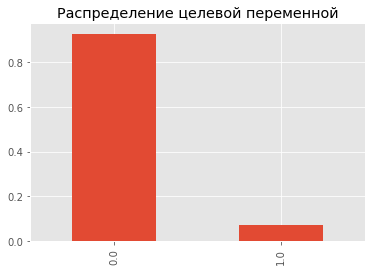

In [7]:
(y.value_counts()/y.shape[0]).plot(kind='bar', title='Распределение целевой переменной');
y.value_counts()/y.shape

In [14]:
# рассмотрим признак buy_time
buy_time_convert = pd.to_datetime(X['buy_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Moscow')
buy_time_convert.head()

0   2018-07-09 00:00:00+03:00
1   2018-07-09 00:00:00+03:00
2   2018-07-09 00:00:00+03:00
3   2018-07-09 00:00:00+03:00
4   2018-07-09 00:00:00+03:00
Name: buy_time, dtype: datetime64[ns, Europe/Moscow]

In [15]:
# у нас данные за 6 месяцев с июля по декабрь
buy_time_convert.dt.month.nunique()

6

In [16]:
buy_time_convert.dt.month_name().unique()

array(['July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [17]:
# данные собраны в один день недели, в понедельник, нет возможности выявить закономерности
buy_time_convert.dt.day_name().nunique()

1

In [18]:
buy_time_convert.dt.day_name().unique()

array(['Monday'], dtype=object)

### Определение типа признаков

In [20]:
# по результатам теста не стала удалять 'id' и 'buy_time' так как нас интересуют пары: id - vas_id, 
# а buy_time в некоторых наблюдениях является единственным отличием

In [157]:
X_nunique = X.apply(lambda x: x.nunique(dropna=False))
f_all = set(X_nunique.index.tolist())
f_const = set(X_nunique[X_nunique == 1].index.tolist())
f_numeric = (X.fillna(0).astype(int).sum() - X.fillna(0).sum()).abs()
f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
f_other = f_all - (f_numeric | f_const)
f_binary = set(X.loc[:, f_other].columns[(
                      (X.loc[:, f_other].max() == 1) & \
                      (X.loc[:, f_other].min() == 0) & \
                      (X.loc[:, f_other].isnull().sum() == 0))])
f_other = f_other - f_binary
f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 10].index.tolist())
f_numeric_extra = f_categorical
f_other = f_other - f_categorical
f_numeric = f_numeric | f_other
f_other = f_other - f_numeric
assert(X_nunique.shape[0] == len(f_const) +  len(f_numeric) + len(f_categorical))
print('f_all:', X.shape[1])
print()
print('f_const:', len(f_const))
print('f_categorical:', len(f_categorical))
print('f_numeric:', len(f_numeric))


f_ok = f_categorical | f_numeric
f_categorical, f_numeric = list(f_categorical), list(f_numeric)

f_all: 256

f_const: 5
f_categorical: 1
f_numeric: 250


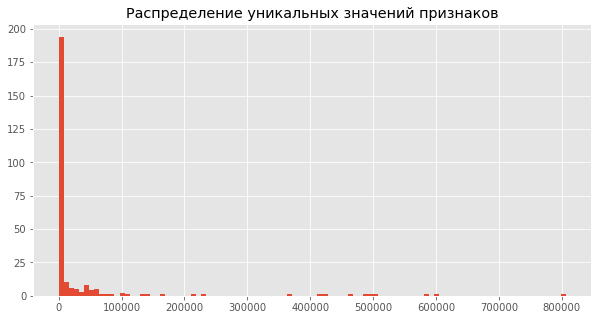

In [8]:
plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(10, 5));

In [21]:
print(f_categorical)

['vas_id']


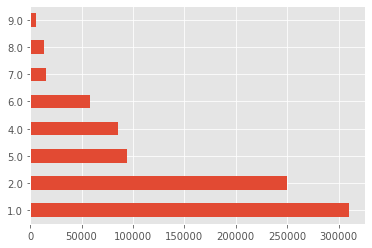

In [22]:
# всего 9 услуг у нас
X['vas_id'].value_counts().plot(kind='barh')
plt.show()

### Pipeline для baseline модели

Для построения baseline модели будем использовать логистическую регрессию.

In [23]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)


In [24]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=list(f_ok)),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="mean"), #в наших данных не пропусков, но оставим для общего случая
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [25]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_train).shape[1]
n_features

258

In [26]:
base_estimator = Pipeline([
    ("f_prep", f_prep_pipeline),
    ('log_reg', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))
])

### Кросс-валидация

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

Посмотрим на значение метрики baseline на кросс-валидации, оно понадобится для сравнения с последующими моделями.

In [75]:
run_cv(base_estimator, kfold_cv, X_train, y_train, model_name="Baseline");

Baseline: roc_auc = 0.87 (+/- 0.00)


### Gridsearch для пайплайнов

In [28]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE)
)

In [29]:
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [78]:
param_grid = {
    "logisticregression__penalty": ['l2'],
    "logisticregression__C": [5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.87

Best parameters set found on development set:

{'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

0.870 (+/-0.003) for {'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}



In [79]:
lg_gsc.best_params_

{'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}

param_grid = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__C": [0.01, 0.1, 5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

сохраним ранее полученые результаты, так как долго считает, прм этом roc aux не улучшилось

Best roc_auc score: 0.87

Best parameters set found on development set:

{'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

nan (+/-nan) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}
0.869 (+/-0.003) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
nan (+/-nan) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
0.870 (+/-0.003) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
nan (+/-nan) for {'logisticregression__C': 5.0, 'logisticregression__penalty': 'l1'}
0.870 (+/-0.003) for {'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}

In [84]:
# Подбор параментров логистической модели не улучшил метрики

### Отбор признаков в пайплайнах

In [107]:
from sklearn.feature_selection import SelectFromModel

In [108]:
# Атрибут estimator класса SelectFromModel должен иметь 
# хотя бы один из атрибутов feature_importances_ или coef_ после выполнения метода fit.
fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5),
)

In [109]:
f_prep_pipeline.fit(X_train)
f_prep_pipeline.transform(X_val).shape

(207914, 258)

In [110]:
fs_pipe.fit(X_train, y_train)
fs_pipe.transform(X_val).shape

(207914, 258)

In [111]:
# Логистическая регрессия из SelectFromModel не обнулила признаки

In [112]:
lg_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5),
    LogisticRegression(random_state=RANDOM_STATE)
)

In [113]:
# оставляю только выбранные параметры сетки
param_grid = [
    {"selectfrommodel__max_features": [10], "selectfrommodel__threshold": [-np.inf]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.87

Best parameters set found on development set:

{'selectfrommodel__max_features': 10, 'selectfrommodel__threshold': -inf}

Grid scores on development set:

0.871 (+/-0.003) for {'selectfrommodel__max_features': 10, 'selectfrommodel__threshold': -inf}



**в данной задаче большое количество признаков, каждый из которых незначительно влияет на окончтельную метрику,
 поэтому нужно искать баланс между количеством признаков и проседанием метрики**
 
 **с 10 признаками получается неплохая метрика**

Best roc_auc score: 0.87

Best parameters set found on development set:

{'selectfrommodel__max_features': 10, 'selectfrommodel__threshold': -inf}

Grid scores on development set:

0.870 (+/-0.003) for {'selectfrommodel__max_features': None, 'selectfrommodel__threshold': -inf}
0.835 (+/-0.002) for {'selectfrommodel__max_features': 5, 'selectfrommodel__threshold': -inf}
0.871 (+/-0.003) for {'selectfrommodel__max_features': 10, 'selectfrommodel__threshold': -inf}
0.870 (+/-0.003) for {'selectfrommodel__max_features': 50, 'selectfrommodel__threshold': -inf}
0.870 (+/-0.003) for {'selectfrommodel__max_features': 100, 'selectfrommodel__threshold': -inf}
0.870 (+/-0.003) for {'selectfrommodel__max_features': 150, 'selectfrommodel__threshold': -inf}
0.870 (+/-0.003) for {'selectfrommodel__threshold': 1e-05}

param_grid = [
    {"selectfrommodel__max_features": [None, 5, 10, 50, 100, 150], "selectfrommodel__threshold": [-np.inf]},
    {"selectfrommodel__threshold": [1e-5]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train, y_train, param_grid, kfold_cv)

In [22]:
#анализ признаков с помощью построения отдельной модели DecisionTreeRegressor для каждого признака и таргета
# в итоге не использовала, так как метрики были лучше со всеми признаками, без сокращения
from sklearn.tree import DecisionTreeRegressor
f_tree_inportance = []
for i, f in enumerate(X.columns):
    treeD = DecisionTreeRegressor(max_depth=3, random_state=42)
    columns = [f]
    X1 = pd.DataFrame(X, columns=columns)
    
    treeD.fit(X1, y)
    #print(f)
    y_pred = treeD.predict(X1)
    
    f_tree_inportance.append([f,np.corrcoef(y_pred, y)[0,1]])

#sorted(f_tree_inportance, key=lambda x:x[1], reverse=True)
# возьмем признаки с f_tree_inportance больше 0.008
feats = [i[0] for i in sorted(f_tree_inportance, key=lambda x:x[0], reverse=True) if i[1] > 0.008]
feats 

['vas_id',
 'id',
 'buy_time',
 '7',
 '6',
 '59',
 '5',
 '43',
 '4',
 '39',
 '3',
 '226',
 '224',
 '213',
 '210',
 '207',
 '193',
 '191',
 '174',
 '146',
 '145',
 '134',
 '125',
 '117',
 '11',
 '1']

# GradientBoosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gb_pipe = make_pipeline(
    f_prep_pipeline, 
    GradientBoostingClassifier()
)

In [101]:
[k for k in gb_pipe.get_params().keys() if 'grad' in k]

['gradientboostingclassifier',
 'gradientboostingclassifier__ccp_alpha',
 'gradientboostingclassifier__criterion',
 'gradientboostingclassifier__init',
 'gradientboostingclassifier__learning_rate',
 'gradientboostingclassifier__loss',
 'gradientboostingclassifier__max_depth',
 'gradientboostingclassifier__max_features',
 'gradientboostingclassifier__max_leaf_nodes',
 'gradientboostingclassifier__min_impurity_decrease',
 'gradientboostingclassifier__min_impurity_split',
 'gradientboostingclassifier__min_samples_leaf',
 'gradientboostingclassifier__min_samples_split',
 'gradientboostingclassifier__min_weight_fraction_leaf',
 'gradientboostingclassifier__n_estimators',
 'gradientboostingclassifier__n_iter_no_change',
 'gradientboostingclassifier__random_state',
 'gradientboostingclassifier__subsample',
 'gradientboostingclassifier__tol',
 'gradientboostingclassifier__validation_fraction',
 'gradientboostingclassifier__verbose',
 'gradientboostingclassifier__warm_start']

In [102]:
# очень долго считает сетку, поэтому оставила max_depth=5 и n_estimators=10

In [103]:
param_grid = {
    "gradientboostingclassifier__max_depth": [5],
    "gradientboostingclassifier__n_estimators": [10]
}

gb_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5,
                    max_features=10), 
    GradientBoostingClassifier()
)

param_grid = {
    "selectfrommodel__threshold": [-np.inf, 1e-05],
    
    "gradientboostingclassifier__max_depth": [1, 5],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

In [104]:
gb_gsc = run_grid_search(gb_pipe, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.93

Best parameters set found on development set:

{'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 10}

Grid scores on development set:

0.930 (+/-0.003) for {'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 10}



# RandomForest

In [71]:
rf_pipe = make_pipeline(
    f_prep_pipeline, 
    RandomForestClassifier(n_estimators = 150, max_depth = 15, random_state=RANDOM_STATE, n_jobs=-1)
)

In [72]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['0', '167', '233',
                                                          '206', '16', '26',
                                                          '230', '130', '48',
                                                          '186', '131', '110',
                                                          '158', '189', '107',
                                                          '83', '27', '109',
                                                          '211', '237', '154',
                                                          '134', '59', '144',
                                                          '151', '115', '207',
                                                          '65', '141', '68', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_featur

In [73]:
print('ready')

ready


In [74]:
preds_rf = rf_pipe.predict_proba(X_val)[:, 1]
preds_rf[:10]

array([0.04924726, 0.04292351, 0.02631312, 0.02939256, 0.02020289,
       0.15700105, 0.02564277, 0.01820786, 0.02403673, 0.02940162])

In [75]:
fpr, tpr, roc_thresholds = roc_curve(y_val, preds_rf)
precision, recall, pr_thresholds = precision_recall_curve(y_val, preds_rf)

RandomForest: AUC_ROC = 0.907


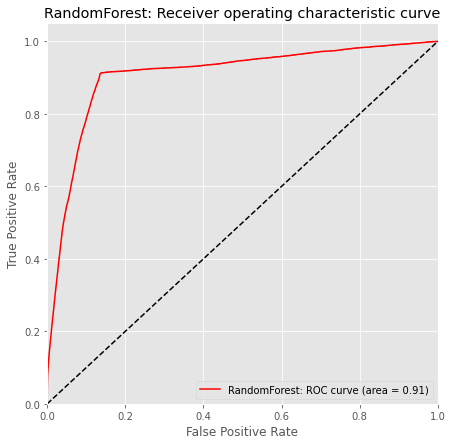

In [76]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "RandomForest", color='r')
print("RandomForest: AUC_ROC = %.3f" % auc(fpr, tpr))

RandomForest: AUC_PR = 0.490


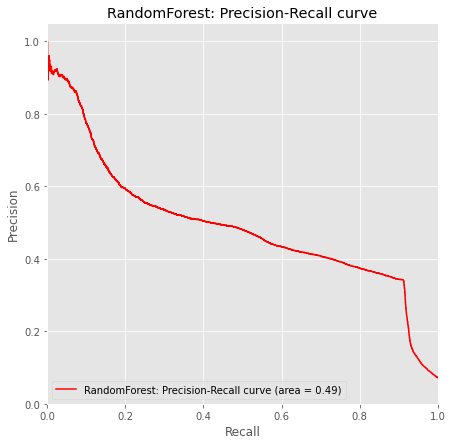

In [77]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "RandomForest", color='r')
print("RandomForest: AUC_PR = %.3f" % auc(recall, precision))

# CatBoost

In [89]:
catb_pipe = make_pipeline(
    f_prep_pipeline, 
    CatBoostClassifier(depth=10.00, iterations=450.00, 
                       learning_rate=0.03, eval_metric='F1', random_state=RANDOM_STATE),
)

In [90]:
catb_pipe.fit(X_train, y_train)

0:	learn: 0.4013156	total: 1.05s	remaining: 7m 52s
1:	learn: 0.3708382	total: 1.89s	remaining: 7m 3s
2:	learn: 0.3705058	total: 2.74s	remaining: 6m 48s
3:	learn: 0.3702646	total: 3.5s	remaining: 6m 30s
4:	learn: 0.3702765	total: 4.5s	remaining: 6m 40s
5:	learn: 0.2050875	total: 5.34s	remaining: 6m 34s
6:	learn: 0.2062501	total: 6.19s	remaining: 6m 31s
7:	learn: 0.3296887	total: 7.03s	remaining: 6m 28s
8:	learn: 0.3603260	total: 7.86s	remaining: 6m 25s
9:	learn: 0.3648889	total: 8.9s	remaining: 6m 31s
10:	learn: 0.3679157	total: 9.75s	remaining: 6m 29s
11:	learn: 0.3660995	total: 10.6s	remaining: 6m 26s
12:	learn: 0.3657018	total: 11.4s	remaining: 6m 22s
13:	learn: 0.3644241	total: 12.4s	remaining: 6m 26s
14:	learn: 0.3650879	total: 13.3s	remaining: 6m 25s
15:	learn: 0.3644319	total: 14.1s	remaining: 6m 23s
16:	learn: 0.3665389	total: 14.9s	remaining: 6m 20s
17:	learn: 0.3640689	total: 15.8s	remaining: 6m 18s
18:	learn: 0.3640386	total: 16.8s	remaining: 6m 22s
19:	learn: 0.3646608	total

157:	learn: 0.3894171	total: 2m 27s	remaining: 4m 32s
158:	learn: 0.3900668	total: 2m 28s	remaining: 4m 31s
159:	learn: 0.3903258	total: 2m 29s	remaining: 4m 30s
160:	learn: 0.3907404	total: 2m 30s	remaining: 4m 29s
161:	learn: 0.3917270	total: 2m 30s	remaining: 4m 28s
162:	learn: 0.3924689	total: 2m 31s	remaining: 4m 27s
163:	learn: 0.3919098	total: 2m 32s	remaining: 4m 26s
164:	learn: 0.3934938	total: 2m 33s	remaining: 4m 25s
165:	learn: 0.3939062	total: 2m 34s	remaining: 4m 24s
166:	learn: 0.3947542	total: 2m 35s	remaining: 4m 23s
167:	learn: 0.3948434	total: 2m 36s	remaining: 4m 22s
168:	learn: 0.3950752	total: 2m 37s	remaining: 4m 22s
169:	learn: 0.3955670	total: 2m 38s	remaining: 4m 20s
170:	learn: 0.3959487	total: 2m 39s	remaining: 4m 19s
171:	learn: 0.3965279	total: 2m 40s	remaining: 4m 19s
172:	learn: 0.3973841	total: 2m 41s	remaining: 4m 18s
173:	learn: 0.3973780	total: 2m 42s	remaining: 4m 17s
174:	learn: 0.3977759	total: 2m 42s	remaining: 4m 16s
175:	learn: 0.3979881	total:

310:	learn: 0.4280871	total: 4m 49s	remaining: 2m 9s
311:	learn: 0.4278360	total: 4m 50s	remaining: 2m 8s
312:	learn: 0.4282285	total: 4m 51s	remaining: 2m 7s
313:	learn: 0.4283384	total: 4m 52s	remaining: 2m 6s
314:	learn: 0.4283540	total: 4m 52s	remaining: 2m 5s
315:	learn: 0.4286364	total: 4m 53s	remaining: 2m 4s
316:	learn: 0.4288940	total: 4m 54s	remaining: 2m 3s
317:	learn: 0.4291069	total: 4m 55s	remaining: 2m 2s
318:	learn: 0.4291652	total: 4m 56s	remaining: 2m 1s
319:	learn: 0.4293131	total: 4m 57s	remaining: 2m
320:	learn: 0.4297474	total: 4m 58s	remaining: 1m 59s
321:	learn: 0.4296087	total: 4m 58s	remaining: 1m 58s
322:	learn: 0.4297186	total: 5m	remaining: 1m 57s
323:	learn: 0.4300833	total: 5m 1s	remaining: 1m 57s
324:	learn: 0.4306786	total: 5m 1s	remaining: 1m 56s
325:	learn: 0.4310628	total: 5m 2s	remaining: 1m 55s
326:	learn: 0.4313584	total: 5m 3s	remaining: 1m 54s
327:	learn: 0.4317025	total: 5m 4s	remaining: 1m 53s
328:	learn: 0.4320582	total: 5m 5s	remaining: 1m 5

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['0', '167', '233',
                                                          '206', '16', '26',
                                                          '230', '130', '48',
                                                          '186', '131', '110',
                                                          '158', '189', '107',
                                                          '83', '27', '109',
                                                          '211', '237', '154',
                                                          '134', '59', '144',
                                                          '151', '115', '207',
                                                          '65', '141', '68', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_featur

In [91]:
preds_catb = catb_pipe.predict_proba(X_val)[:, 1]
preds_catb[:10]

array([0.00034785, 0.02153407, 0.01301807, 0.01391806, 0.00838907,
       0.13593077, 0.0127224 , 0.00609583, 0.01121165, 0.01567751])

In [92]:
fpr, tpr, roc_thresholds = roc_curve(y_val, preds_catb)
precision, recall, pr_thresholds = precision_recall_curve(y_val, preds_catb)

Catboost: AUC_ROC = 0.931


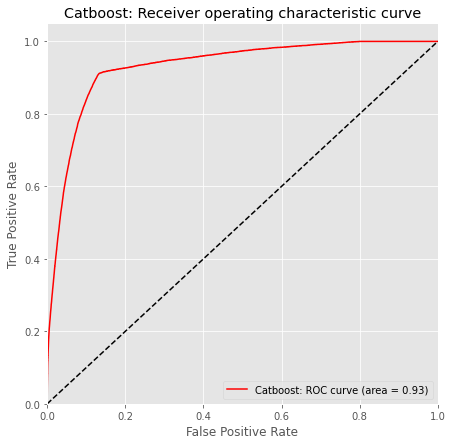

In [93]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Catboost", color='r')
print("Catboost: AUC_ROC = %.3f" % auc(fpr, tpr))

Catboost: AUC_PR = 0.567


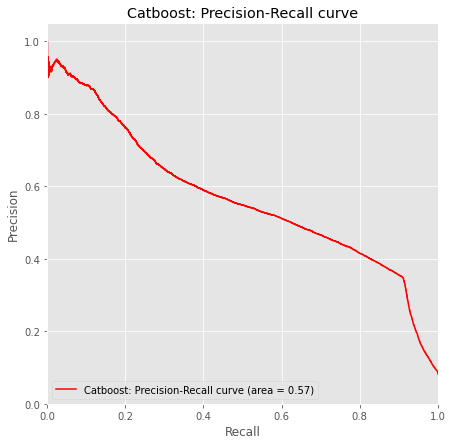

In [94]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Catboost", color='r')
print("Catboost: AUC_PR = %.3f" % auc(recall, precision))

### Сравнение моделей

#### Baseline логистическая регрессия

In [114]:
#baseline 
lg_fs_pipe_final = lg_fs_gsc.best_estimator_

lg_fs_pipe_final.fit(X_train, y_train)

lg_fs_pred = lg_fs_pipe_final.predict_proba(X_val)[:,1]

In [115]:
print(classification_report(y_val, lg_fs_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    192967
         1.0       0.46      0.10      0.17     14947

    accuracy                           0.93    207914
   macro avg       0.70      0.55      0.56    207914
weighted avg       0.90      0.93      0.90    207914



Confusion matrix, without normalization
[[191164   1803]
 [ 13409   1538]]


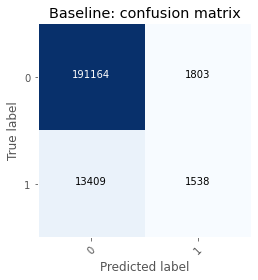

In [127]:
# TN                FP(Type II error)
# 
# FN(Type I error)  TP

cm = confusion_matrix(y_val, lg_fs_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

### Так как финальная метрика проекта f1_macro_avg, а она зависмт от порога вероятности, определим оптимальный

In [133]:
# Посчитаем оптимальный порог для максимизации метрики f1_macro_avg
def optimum_threshold(y_val, y_preds):
    metric_f1_macro_avg = []
    for threshold in np.linspace(0, 1, num=30):
        m = sklearn.metrics.f1_score(y_val, y_preds > threshold, labels=None, 
                                 pos_label=1, average='macro', 
                                 sample_weight=None, zero_division='warn')
        metric_f1_macro_avg.append([threshold, m])
    res = sorted(metric_f1_macro_avg, key=lambda x: x[1], reverse=True)[0]
    return res

In [135]:
lg_fs_opt = optimum_threshold(y_val, lg_fs_pred)
lg_fs_opt[0]

0.27586206896551724

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_val, lg_fs_pred > lg_fs_opt[0]))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95    192967
         1.0       0.41      0.59      0.49     14947

    accuracy                           0.91    207914
   macro avg       0.69      0.76      0.72    207914
weighted avg       0.93      0.91      0.92    207914



#### Градиентный бустинг

In [124]:
gb_pipe_final = gb_gsc.best_estimator_

gb_pipe_final.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['0', '167', '233',
                                                          '206', '16', '26',
                                                          '230', '130', '48',
                                                          '186', '131', '110',
                                                          '158', '189', '107',
                                                          '83', '27', '109',
                                                          '211', '237', '154',
                                                          '134', '59', '144',
                                                          '151', '115', '207',
                                                          '65', '141', '68', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_featur

In [130]:
gb_pred = gb_pipe_final.predict_proba(X_val)[:,1]

In [126]:
print(classification_report(y_val, gb_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    192967
         1.0       0.86      0.13      0.22     14947

    accuracy                           0.94    207914
   macro avg       0.90      0.56      0.59    207914
weighted avg       0.93      0.94      0.91    207914



In [145]:
gb_opt = optimum_threshold(y_val, gb_pred)
print(f'оптимальный порог {gb_opt[0]} для максимизации f1 macro avg')
print(classification_report(y_val, gb_pred > gb_opt[0]))

оптимальный порог 0.20689655172413793 для максимизации f1 macro avg
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96    192967
         1.0       0.46      0.71      0.56     14947

    accuracy                           0.92    207914
   macro avg       0.72      0.82      0.76    207914
weighted avg       0.94      0.92      0.93    207914



#### Random Forest

Confusion matrix, without normalization
[[192967      0]
 [ 14942      5]]


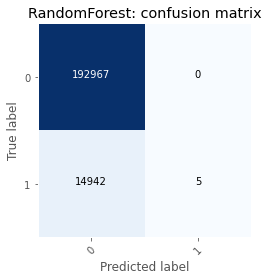

In [78]:
# TN                FP(Type II error)
# 
# FN(Type I error)  TP

cm = confusion_matrix(y_val, preds_rf > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="RandomForest");

In [79]:
print(classification_report(y_val, preds_rf > 0.5))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    192967
         1.0       1.00      0.00      0.00     14947

    accuracy                           0.93    207914
   macro avg       0.96      0.50      0.48    207914
weighted avg       0.93      0.93      0.89    207914



In [144]:
preds_rf_opt = optimum_threshold(y_val, preds_rf)
print(f'оптимальный порог {preds_rf_opt[0]} для максимизации f1 macro avg')
print(classification_report(y_val, preds_rf  > preds_rf_opt[0]))

оптимальный порог 0.1724137931034483 для максимизации f1 macro avg
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    192967
         1.0       0.40      0.72      0.52     14947

    accuracy                           0.90    207914
   macro avg       0.69      0.82      0.73    207914
weighted avg       0.94      0.90      0.91    207914



#### Catboost

Confusion matrix, without normalization
[[190835   2132]
 [ 10752   4195]]


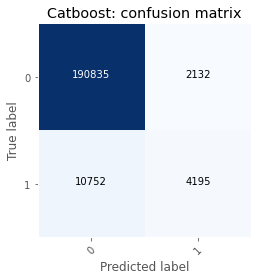

In [146]:
# TN                FP(Type II error)
# 
# FN(Type I error)  TP

cm = confusion_matrix(y_val, preds_catb > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Catboost");

In [147]:
print(classification_report(y_val, preds_catb > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    192967
         1.0       0.66      0.28      0.39     14947

    accuracy                           0.94    207914
   macro avg       0.80      0.63      0.68    207914
weighted avg       0.93      0.94      0.93    207914



In [148]:
preds_catb_opt = optimum_threshold(y_val, preds_catb)
print(f'оптимальный порог {preds_catb_opt[0]} для максимизации f1 macro avg')
print(classification_report(y_val, preds_catb  > preds_catb_opt[0]))

оптимальный порог 0.3103448275862069 для максимизации f1 macro avg
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    192967
         1.0       0.49      0.64      0.56     14947

    accuracy                           0.93    207914
   macro avg       0.73      0.79      0.76    207914
weighted avg       0.94      0.93      0.93    207914



lg_fs_pred: AUC_PR = 0.373
lg_fs_pred: AUC_ROC = 0.873
gb_pred: AUC_PR = 0.564
gb_pred: AUC_ROC = 0.931
RandomForest: AUC_PR = 0.490
RandomForest: AUC_ROC = 0.907
CatBoost: AUC_PR = 0.567
CatBoost: AUC_ROC = 0.931


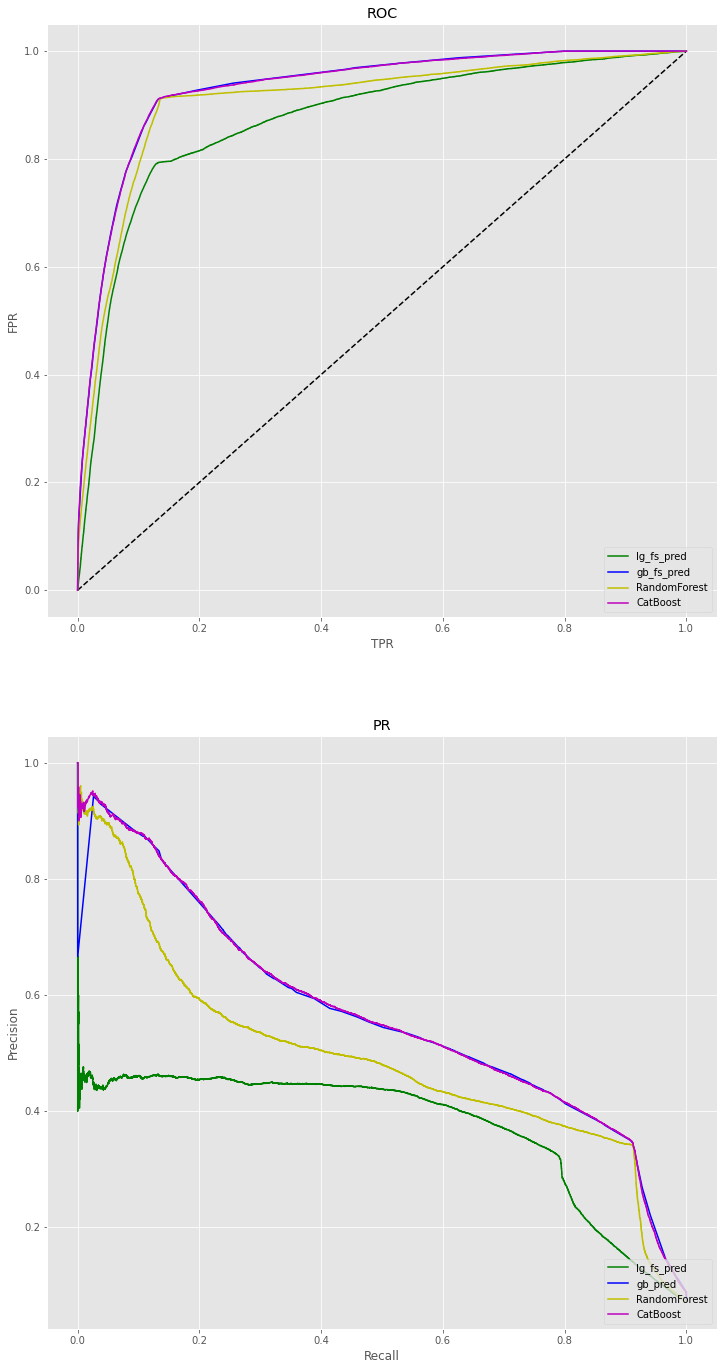

In [141]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(24)
f.set_figwidth(12)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')




fpr, tpr, roc_thresholds = roc_curve(y_val, lg_fs_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_val, lg_fs_pred)
ax1.plot(fpr, tpr, label="lg_fs_pred", color='g')
ax2.plot(recall, precision, label="lg_fs_pred", color='g')
print("lg_fs_pred: AUC_PR = %.3f" % auc(recall, precision))
print("lg_fs_pred: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_val, gb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_val, gb_pred)
ax1.plot(fpr, tpr, label="gb_fs_pred", color='blue')
ax2.plot(recall, precision, label="gb_pred", color='blue')
print("gb_pred: AUC_PR = %.3f" % auc(recall, precision))
print("gb_pred: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_val, preds_rf)
precision, recall, pr_thresholds = precision_recall_curve(y_val, preds_rf)
ax1.plot(fpr, tpr, label='RandomForest', color='y')
ax2.plot(recall, precision, label='RandomForest', color='y')
print("RandomForest: AUC_PR = %.3f" % auc(recall, precision))
print("RandomForest: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_val, preds_catb)
precision, recall, pr_thresholds = precision_recall_curve(y_val, preds_catb)
ax1.plot(fpr, tpr, label='CatBoost', color='m')
ax2.plot(recall, precision, label='CatBoost', color='m')
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))


ax1.legend(loc="lower right")
ax2.legend(loc="lower right");

### Финальная модель

####  Catboost 

In [150]:
final_pipeline = make_pipeline(f_prep_pipeline, 
                                CatBoostClassifier(depth=10.00, iterations=450.00, 
                               learning_rate=0.03, eval_metric='F1', random_state=RANDOM_STATE),
)

In [151]:
# обучаем на всем трейне
final_pipeline.fit(X, y)

0:	learn: 0.3710320	total: 1.22s	remaining: 9m 6s
1:	learn: 0.3713918	total: 2.23s	remaining: 8m 19s
2:	learn: 0.3713615	total: 3.3s	remaining: 8m 11s
3:	learn: 0.3713161	total: 4.58s	remaining: 8m 30s
4:	learn: 0.3714052	total: 5.66s	remaining: 8m 23s
5:	learn: 0.3712243	total: 6.77s	remaining: 8m 20s
6:	learn: 0.3712003	total: 8.26s	remaining: 8m 42s
7:	learn: 0.3711896	total: 9.45s	remaining: 8m 42s
8:	learn: 0.3712047	total: 10.7s	remaining: 8m 44s
9:	learn: 0.3711673	total: 12.2s	remaining: 8m 55s
10:	learn: 0.3711762	total: 13.8s	remaining: 9m 10s
11:	learn: 0.3710906	total: 15s	remaining: 9m 7s
12:	learn: 0.3710951	total: 16.3s	remaining: 9m 8s
13:	learn: 0.3711040	total: 17.4s	remaining: 9m 2s
14:	learn: 0.3711191	total: 18.4s	remaining: 8m 54s
15:	learn: 0.3711281	total: 19.5s	remaining: 8m 49s
16:	learn: 0.3711281	total: 20.6s	remaining: 8m 44s
17:	learn: 0.3711469	total: 22s	remaining: 8m 48s
18:	learn: 0.3711998	total: 23.4s	remaining: 8m 50s
19:	learn: 0.3707753	total: 24.

156:	learn: 0.3782553	total: 3m 22s	remaining: 6m 17s
157:	learn: 0.3785306	total: 3m 23s	remaining: 6m 15s
158:	learn: 0.3786338	total: 3m 24s	remaining: 6m 14s
159:	learn: 0.3788137	total: 3m 25s	remaining: 6m 12s
160:	learn: 0.3792564	total: 3m 26s	remaining: 6m 10s
161:	learn: 0.3792981	total: 3m 27s	remaining: 6m 9s
162:	learn: 0.3795954	total: 3m 28s	remaining: 6m 7s
163:	learn: 0.3793888	total: 3m 29s	remaining: 6m 6s
164:	learn: 0.3792977	total: 3m 31s	remaining: 6m 4s
165:	learn: 0.3795731	total: 3m 32s	remaining: 6m 3s
166:	learn: 0.3797258	total: 3m 33s	remaining: 6m 1s
167:	learn: 0.3804285	total: 3m 34s	remaining: 5m 59s
168:	learn: 0.3803702	total: 3m 35s	remaining: 5m 58s
169:	learn: 0.3812363	total: 3m 36s	remaining: 5m 56s
170:	learn: 0.3817931	total: 3m 37s	remaining: 5m 55s
171:	learn: 0.3819234	total: 3m 38s	remaining: 5m 53s
172:	learn: 0.3820477	total: 3m 40s	remaining: 5m 52s
173:	learn: 0.3822499	total: 3m 41s	remaining: 5m 50s
174:	learn: 0.3820584	total: 3m 42

309:	learn: 0.4110205	total: 6m 25s	remaining: 2m 54s
310:	learn: 0.4115939	total: 6m 26s	remaining: 2m 52s
311:	learn: 0.4118786	total: 6m 27s	remaining: 2m 51s
312:	learn: 0.4119158	total: 6m 28s	remaining: 2m 50s
313:	learn: 0.4121773	total: 6m 29s	remaining: 2m 48s
314:	learn: 0.4124667	total: 6m 31s	remaining: 2m 47s
315:	learn: 0.4125251	total: 6m 32s	remaining: 2m 46s
316:	learn: 0.4126711	total: 6m 33s	remaining: 2m 45s
317:	learn: 0.4124773	total: 6m 34s	remaining: 2m 43s
318:	learn: 0.4125630	total: 6m 36s	remaining: 2m 42s
319:	learn: 0.4124655	total: 6m 37s	remaining: 2m 41s
320:	learn: 0.4126586	total: 6m 38s	remaining: 2m 40s
321:	learn: 0.4129347	total: 6m 40s	remaining: 2m 39s
322:	learn: 0.4128482	total: 6m 41s	remaining: 2m 37s
323:	learn: 0.4128201	total: 6m 43s	remaining: 2m 36s
324:	learn: 0.4133104	total: 6m 44s	remaining: 2m 35s
325:	learn: 0.4139232	total: 6m 45s	remaining: 2m 34s
326:	learn: 0.4141215	total: 6m 46s	remaining: 2m 32s
327:	learn: 0.4142975	total:

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['0', '167', '233',
                                                          '206', '16', '26',
                                                          '230', '130', '48',
                                                          '186', '131', '110',
                                                          '158', '189', '107',
                                                          '83', '27', '109',
                                                          '211', '237', '154',
                                                          '134', '59', '144',
                                                          '151', '115', '207',
                                                          '65', '141', '68', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_featur

In [152]:
print('pipeline fitted')

pipeline fitted


In [153]:
import pickle
with open('final_pipeline.pkl', 'wb') as file:
        pickle.dump(final_pipeline, file)

In [155]:
!pip3 freeze > requirements.txt

In [156]:
DATA_PATH = 'data_test_m.pickle'
MODEL_PATH = 'final_pipeline.pkl'

data = pd.read_pickle(DATA_PATH)
    
res = data[['buy_time', 'id', 'vas_id']]
        
    
with open(MODEL_PATH, 'rb') as file:
    model = pickle.load(file)
    res['target'] = model.predict_proba(data)[:,1]
    res.to_csv('answers_test.csv', index=False)

### При расчете оптимального порога вероятности нужно учитывать бизнес-метрики, стоимость привлечения клиента, стоимость ошибок первого и сторого рода, поскольку в задании эти данные отсутствуют, рассчитываю порог исходя из максимизации требуемой метрики f1 macro avg

### в финальной модели Catboost на валидационной выборке получила оптимальный порог = 0.31 и f1 macro avg = 0.76 